# **Classification with an Academic Success Dataset**

# **1. Data Overview**

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, KFold
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, RobustScaler, MinMaxScaler, FunctionTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import Lasso
from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from scipy.stats import uniform, randint

In [73]:
df = pd.read_csv('train.csv')
pd.set_option('display.max_columns', None)
df.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,19,5,5,122.6,0,0,0,1,0,1,18,0,0,6,6,6,14.500000,0,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,19,9,9,119.8,1,0,0,1,0,0,18,0,0,6,8,4,11.600000,0,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,19,2,3,144.7,0,0,0,1,1,0,18,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,3,3,2,126.1,1,0,0,1,0,1,18,0,0,7,9,7,12.591250,0,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,37,4,9,120.1,1,0,0,1,0,0,18,0,0,7,12,6,12.933333,0,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [74]:
df.shape

(76518, 38)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [76]:
df.isnull().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

In [77]:
df.columns

Index(['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units

In [78]:
df.dtypes

id                                                  int64
Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees u

In [79]:
for i in df.columns:
    print(df[i].value_counts())

id
0        1
51017    1
51015    1
51014    1
51013    1
        ..
25506    1
25505    1
25504    1
25503    1
76517    1
Name: count, Length: 76518, dtype: int64
Marital status
1    70189
2     5296
4      866
5      116
6       35
3       16
Name: count, dtype: int64
Application mode
1     35227
17    16523
39    14519
44     3012
43     2671
7      1498
18     1256
42      551
51      442
16      265
53      225
15      183
5        87
10       43
2         8
27        2
12        1
26        1
4         1
35        1
9         1
3         1
Name: count, dtype: int64
Application order
1    54381
2     8875
3     5364
4     3822
5     2125
6     1947
0        3
9        1
Name: count, dtype: int64
Course
9500    12074
9773     8214
9238     7935
9147     7741
9254     5425
9085     5373
9670     4760
9991     4057
9003     3733
9070     3281
9853     3198
9119     3004
171      2859
8014     2438
9130     1606
9556      746
33         72
979         1
39          1
Name: count, dty

In [80]:
df.describe(include='all').round(2).style.format(precision=2).background_gradient(cmap='viridis')

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,76518.00,76518.00,76518.00,76518.00,76518.00,76518.00,76518.00,76518.00,76518.00,76518.00,76518.00,76518.00,76518.00,76518.00,76518.00,76518.00,76518.00,76518.00,76518.00,76518.00,76518.00,76518.00,76518.00,76518.00,76518.00,76518.00,76518.00,76518.00,76518.00,76518.00,76518.00,76518.00,76518.00,76518.00,76518.00,76518.00,76518.00,76518
unique,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,3
top,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Graduate
freq,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,36282
mean,38258.50,1.11,16.05,1.64,9001.29,0.92,3.66,132.38,1.23,19.84,23.43,8.58,8.88,125.36,0.57,0.00,0.07,0.89,0.32,0.25,22.28,0.01,0.19,5.89,7.35,4.18,10.00,0.06,0.14,5.93,7.23,4.01,9.63,0.06,11.52,1.23,-0.08,nan
std,22088.99,0.44,16.68,1.23,1803.44,0.28,8.62,11.00,3.39,15.40,14.92,17.47,16.80,12.56,0.50,0.06,0.26,0.31,0.46,0.43,6.89,0.08,1.18,1.67,3.51,2.69,5.26,0.41,0.93,1.63,3.50,2.77,5.55,0.46,2.65,1.40,2.25,nan
min,0.00,1.00,1.00,0.00,33.00,0.00,1.00,95.00,1.00,1.00,1.00,0.00,0.00,95.00,0.00,0.00,0.00,0.00,0.00,0.00,17.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.60,-0.80,-4.06,nan
25%,19129.25,1.00,1.00,1.00,9119.00,1.00,1.00,125.00,1.00,1.00,4.00,4.00,5.00,118.00,0.00,0.00,0.00,1.00,0.00,0.00,18.00,0.00,0.00,5.00,6.00,2.00,10.67,0.00,0.00,5.00,6.00,1.00,10.00,0.00,9.40,0.30,-1.70,nan
50%,38258.50,1.00,17.00,1.00,9254.00,1.00,1.00,133.10,1.00,19.00,19.00,7.00,7.00,124.60,1.00,0.00,0.00,1.00,0.00,0.00,19.00,0.00,0.00,6.00,7.00,5.00,12.17,0.00,0.00,6.00,7.00,5.00,12.14,0.00,11.10,1.40,0.32,nan
75%,57387.75,1.00,39.00,2.00,9670.00,1.00,1.00,140.00,1.00,37.00,37.00,9.00,9.00,132.00,1.00,0.00,0.00,1.00,1.00,0.00,23.00,0.00,0.00,6.00,9.00,6.00,13.31,0.00,0.00,6.00,9.00,6.00,13.24,0.00,12.70,2.60,1.79,nan


# **2. Exploratory Data Analysis**

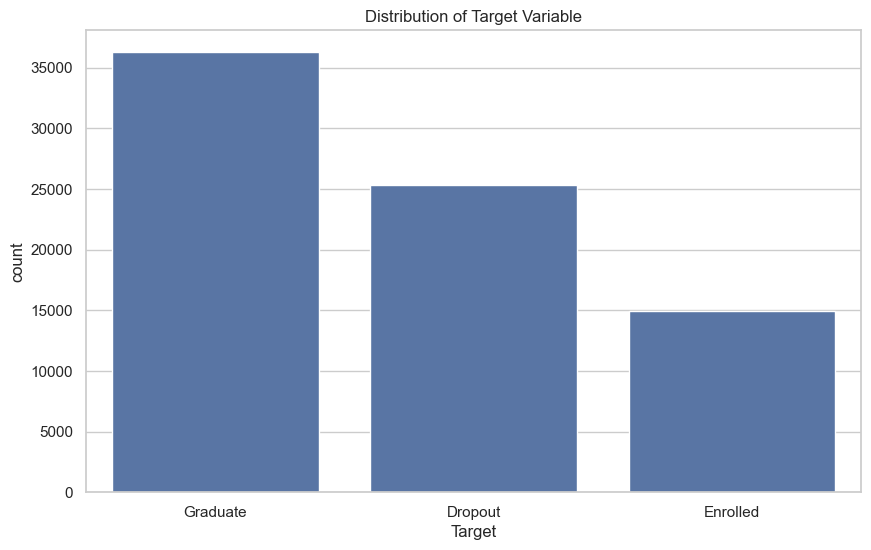

In [81]:
sns.set(style="whitegrid")

# Plot the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='Target', data=df)
plt.title('Distribution of Target Variable')
plt.show()

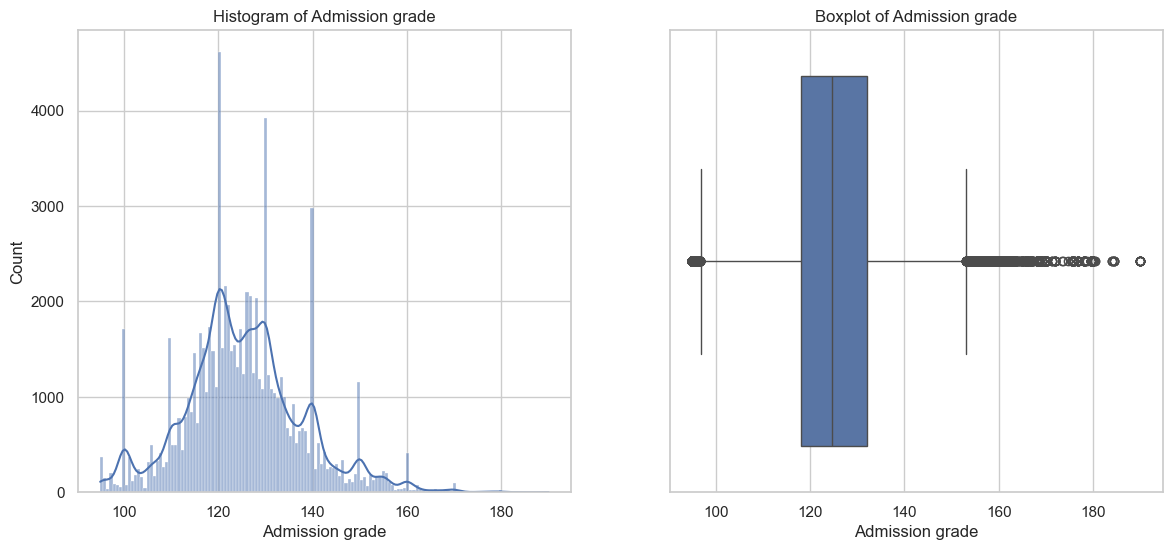

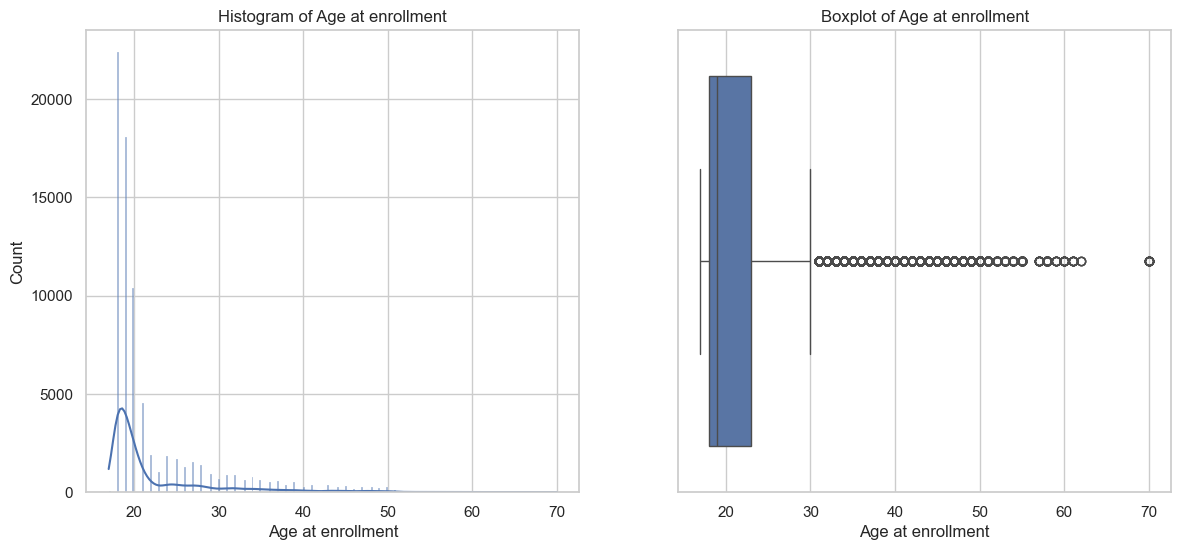

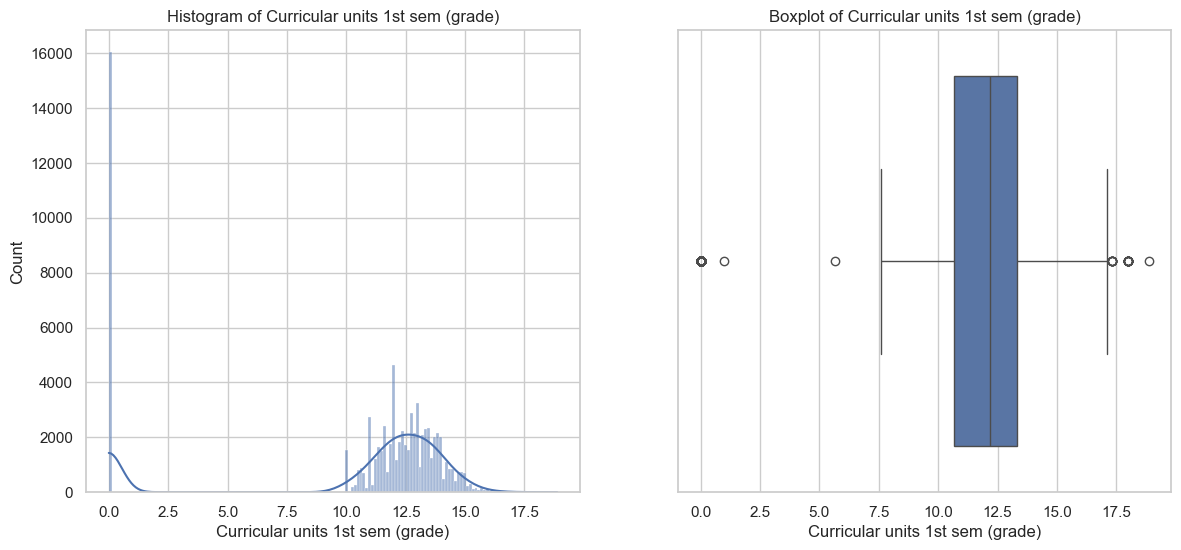

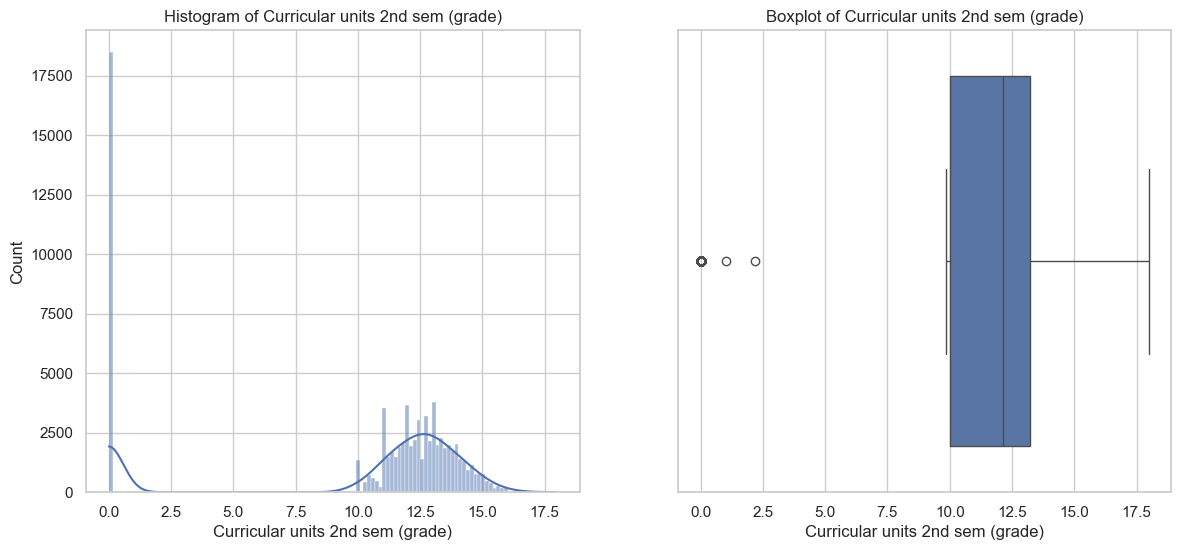

In [82]:
num_cols = ['Admission grade', 'Age at enrollment', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']

# Plot histograms and boxplots for selected numerical features
for col in num_cols:
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    
    plt.show()

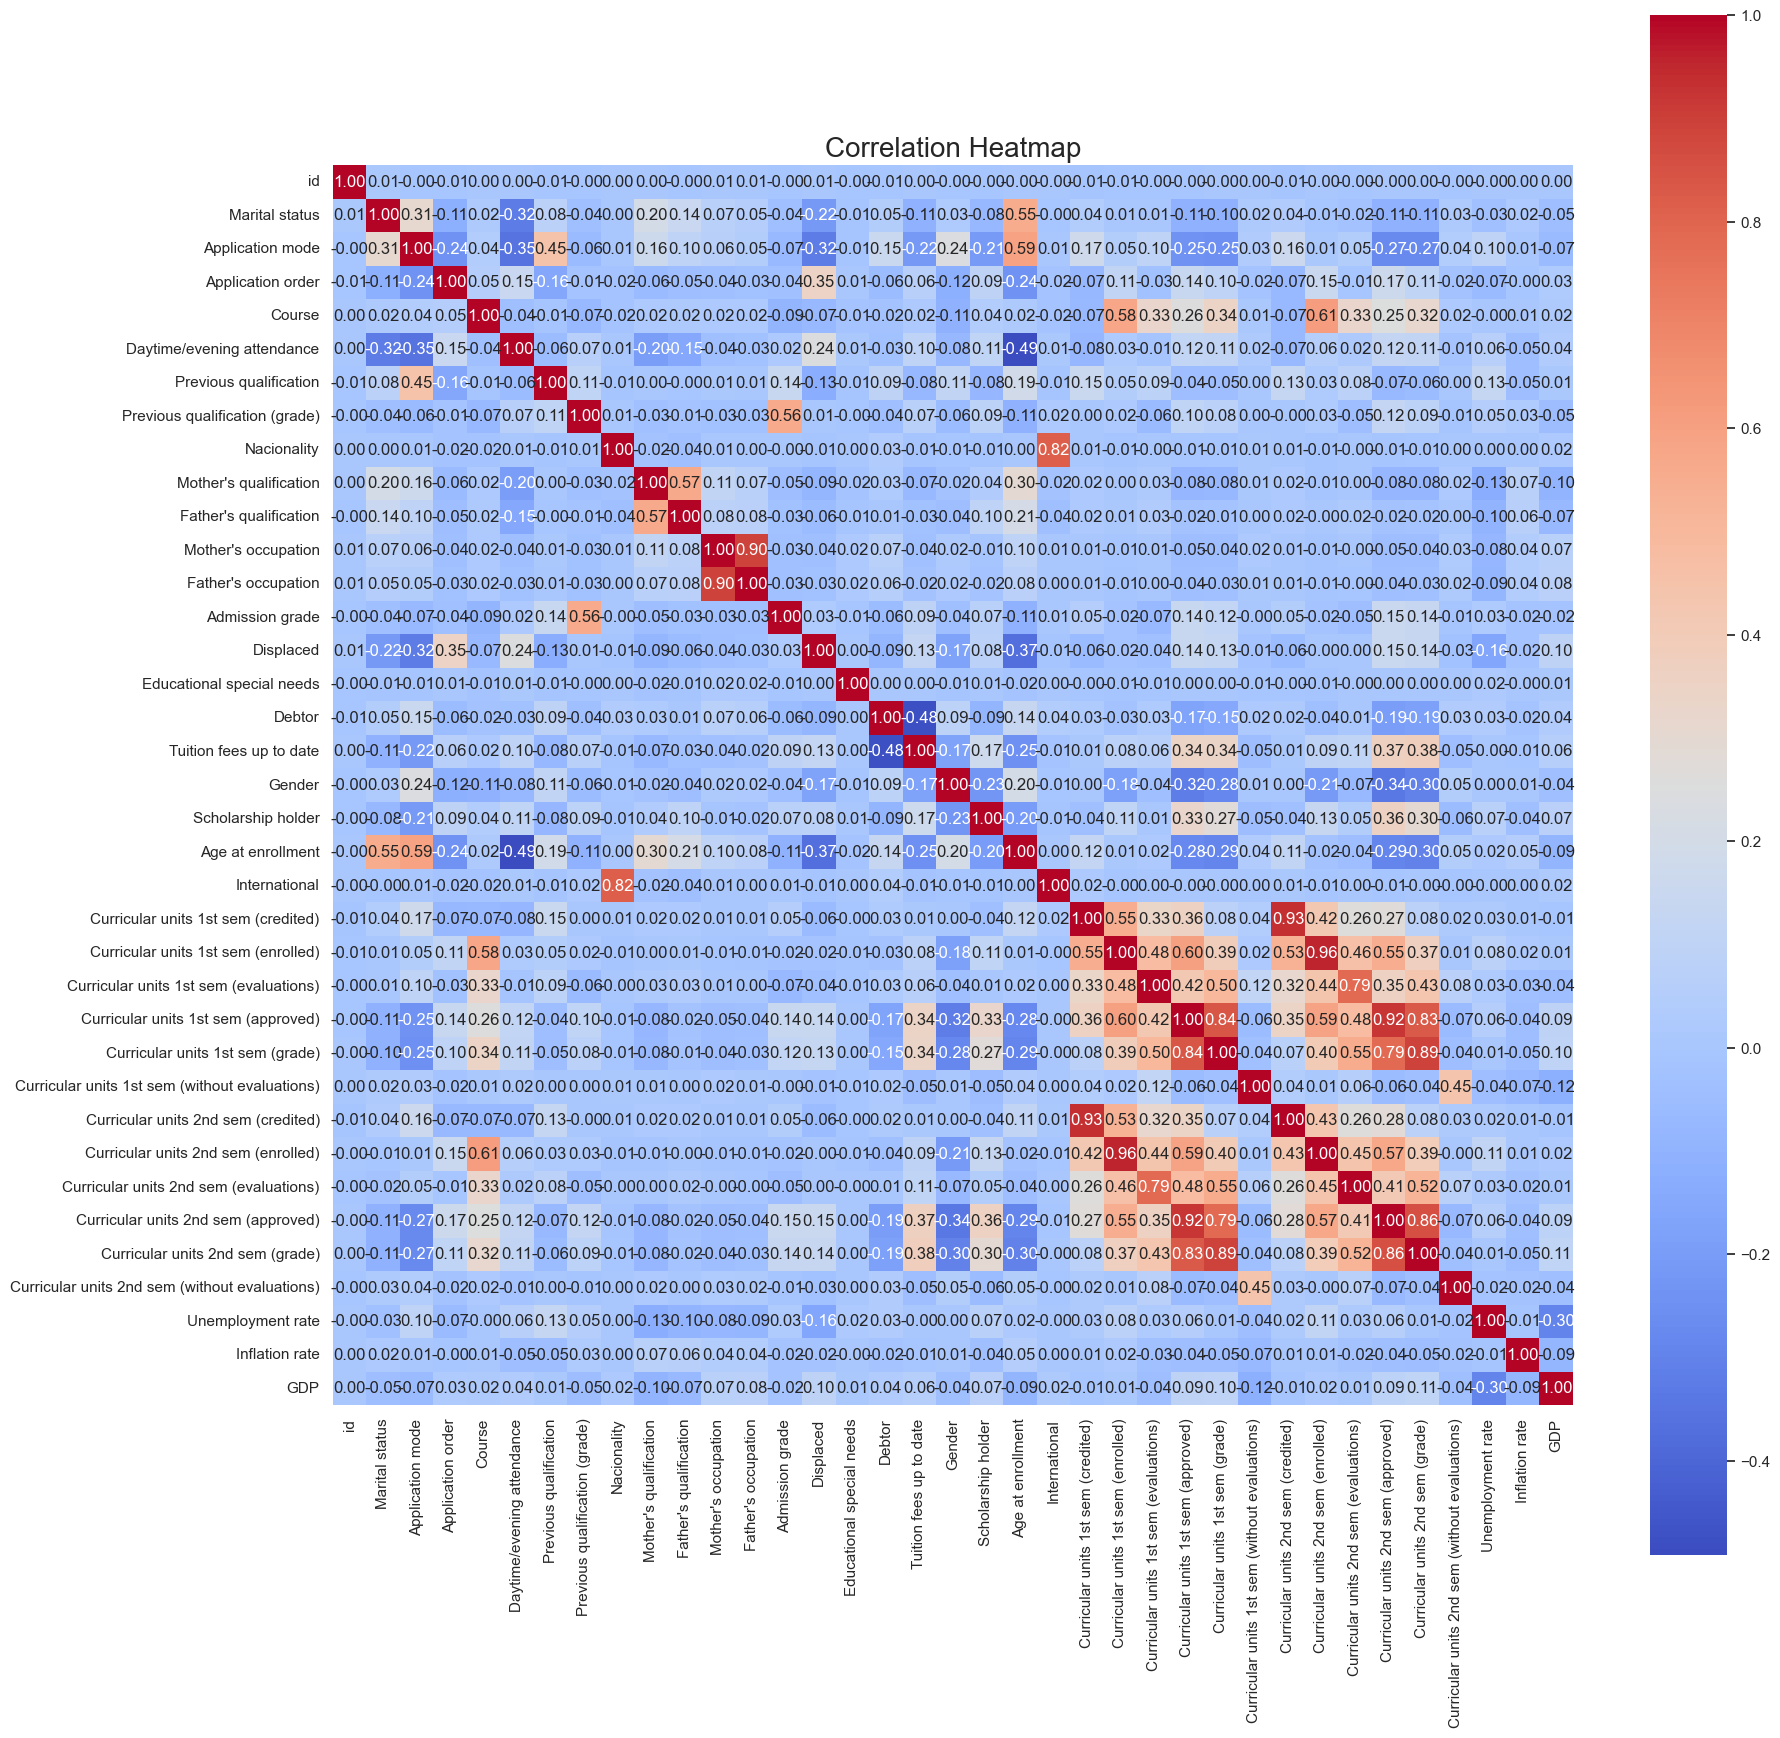

In [83]:
# Correlation heatmap
plt.figure(figsize=(20, 20))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

# **3. Feature Engineering**

In [84]:
# def generate_features(df):
#     numerical_columns = df.columns
    
#     # Create new features
#     df['units failed 1'] = df['Curricular units 1st sem (enrolled)'] - df['Curricular units 1st sem (approved)']    
#     df['Inflation_GDP_ratio'] = df['Inflation rate'] / df['GDP']
#     df['Unemployment_GDP_ratio'] = df['Unemployment rate'] / df['GDP']
#     df['GDP_inflation_interaction'] = df['GDP'] * df['Inflation rate']
#     return df

In [85]:
# df = generate_features(df)

In [86]:
# df.drop(columns=[
#     'Curricular units 1st sem (enrolled)',
#     'Curricular units 1st sem (approved)',
#     'Inflation rate',
#     'GDP',
#     'Unemployment rate'
# ], inplace=True)

In [87]:
categories = [
    ['Dropout', 'Enrolled', 'Graduate']
]
ordinal_encoder = OrdinalEncoder(categories=categories)
df['Target'] = ordinal_encoder.fit_transform(df[['Target']])

In [88]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['id', 'Target']),
                                                    df['Target'],
                                                    test_size=0.3,
                                                    random_state=42)

In [89]:
def reduce_features(df):
    variance_threshold = VarianceThreshold(threshold=0.01)
    df_reduced = variance_threshold.fit_transform(df)
    
    df_reduced = pd.DataFrame(df_reduced, columns=df.columns[variance_threshold.get_support()])
    
    corr_matrix = df_reduced.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
    df_reduced = df_reduced.drop(columns=to_drop)
    
    return df_reduced

In [90]:
def cap_outliers(df):
    for column in df.select_dtypes(include='number').columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

In [91]:
numerical_features = [X_train.columns.get_loc(col) for col in X_train.select_dtypes(include=['float64', 'int64']).columns]

In [92]:
reduce_features_transformer = FunctionTransformer(reduce_features, validate=False)
cap_outliers_transformer = FunctionTransformer(cap_outliers, validate=False)

In [93]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [94]:
pca = PCA(n_components=1.95)

In [95]:
handle_numerical = Pipeline(steps=[
    ('cap_outliers', cap_outliers_transformer),
    ('reduce_features', reduce_features_transformer),
    ('scaler', RobustScaler()),
    ('impute', SimpleImputer(strategy='mean'))
])

In [96]:
preprocessing = ColumnTransformer(transformers=[
    ('numerical', handle_numerical, numerical_features)
])

In [97]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}

In [98]:
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessing), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy Score: {accuracy:.2f}')

Random Forest Accuracy Score: 0.81
Gradient Boosting Accuracy Score: 0.81
XGBoost Accuracy Score: 0.82
